This notebook shows how to use functions for loading data as well asfor training deep learning models

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from keras import optimizers
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from load_preprocess import (load_data,
                             get_xy,
                             scale_data,
                             binarize_y,
                             prepare_data)
from deep_learning_keras import plot_loss, train_model

Using TensorFlow backend.
C:\Users\gilbe\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load data with load

In [2]:
train = load_data(file='all_training_400_minisensor_1.csv')
test = load_data(file='all_test_400_minisensor.csv')

### Preprocess data

In [6]:
xtrain, ytrain, xtest, ytest = prepare_data(train, test)
xtrain_sc, xtest_sc = scale_data(xtrain, xtest)

### Prepere train and test sets, transform y to binary codes

In [7]:
model, history = train_model(xtrain_sc, ytrain, xtest_sc, ytest)
pred_train = model.predict_classes(xtrain_sc)
pred_test = model.predict_classes(xtest_sc)
print('Training score:', f1_score(ytrain, pred_train))
print('Test score:', f1_score(ytest, pred_test))

Train on 91104 samples, validate on 22776 samples
Epoch 1/20
91104/91104 [==============================] - 16s - loss: 0.8921 - acc: 0.5414 - val_loss: 0.4511 - val_acc: 0.9485
Epoch 2/20
91104/91104 [==============================] - 8s - loss: 0.7234 - acc: 0.6221 - val_loss: 0.4209 - val_acc: 0.9857
Epoch 3/20
91104/91104 [==============================] - 8s - loss: 0.6207 - acc: 0.7046 - val_loss: 0.3785 - val_acc: 0.9982
Epoch 4/20
91104/91104 [==============================] - 8s - loss: 0.5329 - acc: 0.7858 - val_loss: 0.3299 - val_acc: 1.0000
Epoch 5/20
91104/91104 [==============================] - 8s - loss: 0.4571 - acc: 0.8521 - val_loss: 0.2799 - val_acc: 1.0000
Epoch 6/20
91104/91104 [==============================] - 8s - loss: 0.3884 - acc: 0.9026 - val_loss: 0.2300 - val_acc: 1.0000
Epoch 7/20
91104/91104 [==============================] - 8s - loss: 0.3256 - acc: 0.9379 - val_loss: 0.1851 - val_acc: 1.0000
Epoch 8/20
91104/91104 [==============================] - 10

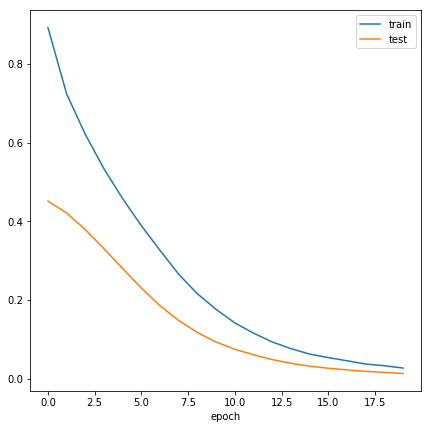

In [8]:
plot_loss(history)